In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, mannwhitneyu
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_2023= pd.read_csv('data/2023/외래관광객조사_2023_전처리2.csv')
df_2024= pd.read_csv('data/2024/외래관광객조사_2024_전처리2.csv')

In [3]:
# 2024년 컬럼명 통일
df_2024.rename(columns={
    '총액1인TOT_개별국제 교통비제외2': '총액1인TOT항공제외2'
}, inplace=True)

In [4]:
# 23, 24년도 데이터 병합
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

In [5]:
# 병합된 데이터 확인
print(df_all.shape)
print(df_all['year'].value_counts())  # 연도별 분포 확인

(17123, 26)
year
2024    8769
2023    8354
Name: count, dtype: int64


In [6]:
# 그룹 나누기
g1 = df_all[df_all['웰니스참여'] == 1]['총액1인TOT항공제외2'].dropna()
g2 = df_all[df_all['웰니스참여'] == 0]['총액1인TOT항공제외2'].dropna()

In [7]:
# t-test
t_stat, p_value = ttest_ind(g1, g2, equal_var=False)
print("t-test p-value:", p_value)

t-test p-value: 0.16159905261448


In [8]:
# 평균·중위수 비교
print("참여자 평균 지출:", g1.mean())
print("비참여자 평균 지출:", g2.mean())
print("참여자 중위 지출:", g1.median())
print("비참여자 중위 지출:", g2.median())

참여자 평균 지출: 1425.8381892523364
비참여자 평균 지출: 1381.539875699192
참여자 중위 지출: 1030.2800000000002
비참여자 중위 지출: 941.93


In [9]:
# Mann-Whitney
# 그룹 나누기 
g1 = df_all[df_all['웰니스참여'] == 1]['총액1인TOT항공제외2'].dropna()
g2 = df_all[df_all['웰니스참여'] == 0]['총액1인TOT항공제외2'].dropna()

In [10]:
# Mann-Whitney 
u_stat, p_u = mannwhitneyu(g1, g2, alternative='two-sided')
print("Mann-Whitney U p-value:", p_u)

Mann-Whitney U p-value: 7.742785605265836e-10


In [11]:
print("참여자 중위 지출:", g1.median())
print("비참여자 중위 지출:", g2.median())

참여자 중위 지출: 1030.2800000000002
비참여자 중위 지출: 941.93


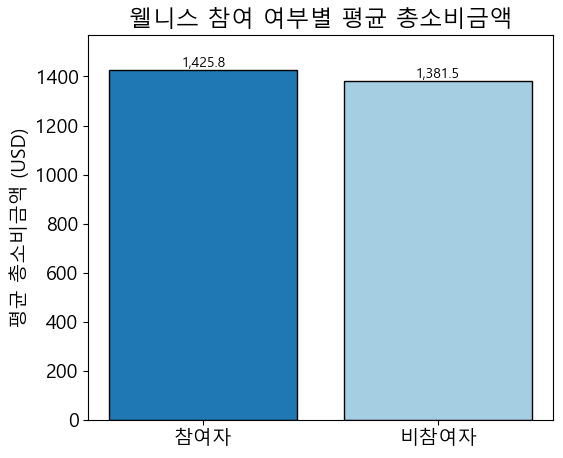

In [14]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 평균 계산
means = [g1.mean(), g2.mean()]
labels = ['참여자', '비참여자']

# 막대그래프
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, means, color=['#1f78b4', '#a6cee3'], edgecolor='black')

# y값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:,.1f}', ha='center', va='bottom', fontsize=10)

plt.ylabel('평균 총소비금액 (USD)')
plt.title('웰니스 참여 여부별 평균 총소비금액')
plt.ylim(0, max(means) * 1.1)
plt.grid(False)
plt.show()
